## Final Project Submission

Please fill out:
* Student name:  **Victor Mawira Micheni**
* Student pace:  **full time**
* Scheduled project review date/time: **12th March 2023**
* Instructor name: **Antonny Muiko**
* Blog post URL:



# Business Understanding

Movie production is an expensive venture which can lead to serious losses especially when ventured carelessly without adequate knowledge of the video type ,Genre , and amount used in production.
Therefore, this project is aimed at helping the head of Microsoft's New Movie Studio study various film types produced by companies that create original film.
Reviews and ratings from past movies and tv shows produced will be studied, analysed and visualized. Insights drawn from the study will be used in the decision making of the type of movie to be produced by the upcoming Microsoft's New Movie Studio.

This study focuses mainly to help the stakeholders who are Microsoft get answers to movie genre they should venture in, averange returns to expect, and movie length that attracts most viewers. 

# Data Understanding
* *bom.movie.csv*
This is a CSV file that is found in the file path "Data/bom.movie_gross.csv". Contained in the file is information about various movies showing year of production,company of production, and money fetched from local market, and foreign market. Original data before cleaning contained 3387 rows and 5 columns.

Columns present in the file are:
   *  **title** - It contains movie names
   *  **studio** - Contains production studio
   *  **domestic gross** - Contains money fetched from selling to buyers in the production country
   *  **foreign gross** - money fetched sales around the world
   *  **year** - year of production.

In [114]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


i. bom.movie_gross.csv

In [115]:
# importing the Dataframe and displaying the head
Bom_Movie = pd.read_csv('Data/bom.movie_gross.csv')
Bom_Movie.head(10)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [116]:
# checking for duplicates
Bom_Movie.duplicated().sum()


0

In [117]:
# There are no duplicates in the above dataframe.
# Checking for Nan Values and removing if possible.
Bom_Movie.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

From the above we have null values in foreign gross, studio, and domestic gross. Foreign_gross, has many misssing values hence will be dropped.

In [118]:
# dropping foreign_gross, year,and title.
# year and title will not be very useful in the analysis.
Bom_Movie.drop(['title', 'year', 'foreign_gross'], axis=1, inplace=True)


In [119]:
# New dataframe
Bom_Movie


,studio,domestic_gross
0,BV,415000000.0
1,BV,334200000.0
2,WB,296000000.0
3,WB,292600000.0
4,P/DW,238700000.0
...,...,...
3382,Magn.,6200.0
3383,FM,4800.0
3384,Sony,2500.0
3385,Synergetic,2400.0


In [120]:
Bom_Movie.isna().sum()
# From the above we will drop null values present in the studio column then fill domestic_gross values.


studio             5
domestic_gross    28
dtype: int64

In [121]:
Bom_Movie.describe()


,domestic_gross
count,3.359000e+03
mean,2.874585e+07
std,6.698250e+07
min,1.000000e+02
25%,1.200000e+05
50%,1.400000e+06
75%,2.790000e+07
max,9.367000e+08


In [122]:
# Filling missing values in domestic_gross
Bom_Movie['domestic_gross'].fillna(
    Bom_Movie['domestic_gross'].median(), inplace=True)


In [123]:
Bom_Movie.isna().sum()


studio            5
domestic_gross    0
dtype: int64

In [124]:
Bom_Movie.dropna(inplace=True)


In [125]:
# confirming there are no missing values.
Bom_Movie.isna().sum()


studio            0
domestic_gross    0
dtype: int64

In [126]:
# sorting the DataFrame
Bom_Movie_New = Bom_Movie.groupby('studio')['domestic_gross'].mean()
Bom_Movie_New = Bom_Movie_New.sort_values(ascending=False).head(10)
Bom_Movie_New


studio
BV         1.737644e+08
P/DW       1.682900e+08
WB (NL)    8.879333e+07
Uni.       8.777138e+07
WB         8.691461e+07
Fox        8.051103e+07
Sony       7.691894e+07
Par.       7.609773e+07
MGM        6.666667e+07
Sum.       6.212473e+07
Name: domestic_gross, dtype: float64

In [127]:
# converting the data to a dataframe
Bom_Movie_New_df1 = pd.DataFrame(Bom_Movie_New)
type(Bom_Movie_New_df1)


pandas.core.frame.DataFrame

In [128]:
# Data Analysis and Visualization
# displaying the dataframe
Bom_Movie_New_df2 = Bom_Movie_New_df1.reset_index('studio')


In [129]:
Bom_Movie_New_df2


,studio,domestic_gross
0,BV,1.737644e+08
1,P/DW,1.682900e+08
2,WB (NL),8.879333e+07
3,Uni.,8.777138e+07
4,WB,8.691461e+07
5,Fox,8.051103e+07
6,Sony,7.691894e+07
7,Par.,7.609773e+07
8,MGM,6.666667e+07
9,Sum.,6.212473e+07


ii. Movie Basics

In [130]:
import sqlite3
conn = sqlite3.connect('Data/im.db')

# Check tables present in the data base

table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)


,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [131]:
# selecting the movie_basics table
db_data = pd.read_sql("""SELECT * FROM movie_basics""", conn)
db_data.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [132]:
# checking information of the Movie_basics table for presence of duplicates.
db_data.duplicated().sum()


0

In [133]:
# Checking the tables information
db_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [134]:
# check missing values in the movie_basics table
db_data.isna().sum()


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The results above show the presence of missing values in runtime_minutes, genres and original_title.

In [135]:
# Droping the title columns in the table above.
db_data.drop('original_title', axis=1, inplace=True)


In [136]:
db_data


,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,None


In [137]:
# Droping the primary title column
db_data.drop('primary_title', axis=1, inplace=True)


To avoid introduction of disturbances in the data, we will drop all the rows that have null values.

In [138]:
db_data = db_data.dropna(axis=0)


In [139]:
# new data set's head
db_data.head(10)


,movie_id,start_year,runtime_minutes,genres
0,tt0063540,2013,175.0,"Action,Crime,Drama"
1,tt0066787,2019,114.0,"Biography,Drama"
2,tt0069049,2018,122.0,Drama
4,tt0100275,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,2018,75.0,Comedy
7,tt0137204,2017,83.0,"Adventure,Animation,Comedy"
9,tt0144449,2012,82.0,Biography
10,tt0146592,2010,136.0,Drama
11,tt0154039,2010,100.0,History
12,tt0159369,2013,180.0,Documentary


*** data analysis ***

In [140]:
# measuring central tendency for the data
db_data.describe()


,start_year,runtime_minutes
count,112233.000000,112233.000000
mean,2014.402101,86.261902
std,2.639042,167.895938
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


From the above description, the averange runtime in minutes is 86 minutes from the 112233 responses available.

iii. Movie_ Rating

In [141]:
# Reading the mvie rating column
Movie_Ratingdf = pd.read_sql("""
SELECT *
FROM Movie_ratings;
""", conn)


In [142]:
# Displaying the head
Movie_Ratingdf.head(10)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [143]:
# checking the info of the table
Movie_Ratingdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [144]:
# checking presence of repetition
Movie_Ratingdf.duplicated().sum()


0

In [145]:
# Checking for Null values
Movie_Ratingdf.isna().sum()


movie_id         0
averagerating    0
numvotes         0
dtype: int64

The table above has no repetitions, null values, and missing values. Therefore, since they have almost related columns we join the two tables.

In [146]:
q ='''SELECT movie_id, original_title, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
;
'''
imdb = pd.read_sql(q,conn)

# Data Analysis

i. bom.movie

In [147]:
# displaying the dataset
Bom_Movie_New_df2


,studio,domestic_gross
0,BV,1.737644e+08
1,P/DW,1.682900e+08
2,WB (NL),8.879333e+07
3,Uni.,8.777138e+07
4,WB,8.691461e+07
5,Fox,8.051103e+07
6,Sony,7.691894e+07
7,Par.,7.609773e+07
8,MGM,6.666667e+07
9,Sum.,6.212473e+07


In [148]:
# measurements of central tendency for the data
Bom_Movie_New_df2.describe()


,domestic_gross
count,1.000000e+01
mean,9.678529e+07
std,4.010714e+07
min,6.212473e+07
25%,7.630303e+07
50%,8.371282e+07
75%,8.853785e+07
max,1.737644e+08


In [149]:
# which movie studio has the highest domestic gross
Bom_Movie_New_df3 = Bom_Movie_New_df2.domestic_gross.groupby(
    Bom_Movie_New_df2['studio']).max()
Bom_Movie_New_df4 = Bom_Movie_New_df3.sort_values(ascending=False).head(10)
Bom_Movie_New_df4


studio
BV         1.737644e+08
P/DW       1.682900e+08
WB (NL)    8.879333e+07
Uni.       8.777138e+07
WB         8.691461e+07
Fox        8.051103e+07
Sony       7.691894e+07
Par.       7.609773e+07
MGM        6.666667e+07
Sum.       6.212473e+07
Name: domestic_gross, dtype: float64

Studio BV has the highest domestic_gross of 1.737e+08 followed by P/DW with 1.683e+08

ii. Movie db

In [150]:
# data preview
imdb.head()

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119


In [151]:
# identifying the movies genres with the highest ratings.
highest_rate = imdb.averagerating.groupby(imdb['genres']).max()
highest_ratings = highest_rate.sort_values(ascending = False).head(12)
highest_ratings

genres
Comedy,Drama                   10.0
Adventure,Comedy               10.0
Documentary,History            10.0
Documentary                    10.0
Crime,Documentary              10.0
Drama                          10.0
Comedy,Documentary              9.8
Documentary,Music               9.8
Action                          9.8
Biography,Documentary,Music     9.8
Biography,Documentary,Drama     9.8
Comedy,Documentary,Sport        9.7
Name: averagerating, dtype: float64

In [152]:
# identifying the movies genres with the highest votes.
highest_vote = imdb.numvotes.groupby(imdb['genres']).max()
highest_votes = highest_vote.sort_values(ascending = False).head(12)
highest_votes

genres
Action,Adventure,Sci-Fi     1841066
Action,Thriller             1387769
Adventure,Drama,Sci-Fi      1299334
Drama,Western               1211405
Biography,Crime,Drama       1035358
Mystery,Thriller            1005960
Action,Adventure,Comedy      948394
Action,Adventure,Fantasy     784780
Drama,Mystery,Thriller       761592
Adventure,Family,Fantasy     719629
Drama,Sci-Fi,Thriller        710018
Adventure,Drama,Fantasy      691835
Name: numvotes, dtype: int64

In [153]:
#Movies with awesome ratings
best_movie = imdb.averagerating.groupby(imdb['original_title']).max()
best_movies = best_movie.sort_values(ascending = False).head(20)
best_movies

original_title
Renegade                                                           10.0
Fly High: Story of the Disc Dog                                    10.0
Calamity Kevin                                                     10.0
Atlas Mountain: Barbary Macaques - Childcaring Is the Man's Job    10.0
Ellis Island: The Making of a Master Race in America               10.0
Hercule contre Hermès                                              10.0
All Around Us                                                      10.0
Pick It Up! - Ska in the '90s                                      10.0
I Was Born Yesterday!                                              10.0
Requiem voor een Boom                                              10.0
Freeing Bernie Baran                                               10.0
Revolution Food                                                    10.0
Exteriores: Mulheres Brasileiras na Diplomacia                     10.0
The Dark Knight: The Ballad of the N Word        

In [154]:
# identifying the movies runtime minutes with the highest ratings.
run_time = imdb.averagerating.groupby(imdb['runtime_minutes']).max()
run_times = run_time.sort_values(ascending = False).head(15)
run_times

runtime_minutes
93.0     10.0
129.0    10.0
48.0     10.0
99.0     10.0
31.0     10.0
100.0    10.0
52.0     10.0
65.0     10.0
77.0     10.0
59.0     10.0
70.0     10.0
72.0     10.0
87.0      9.9
51.0      9.9
138.0     9.9
Name: averagerating, dtype: float64

In [155]:
# identifying the movies runtime minutes with the highest votes.
runtimevote = imdb.numvotes.groupby(imdb['runtime_minutes']).max()
runtimevotes= runtimevote.sort_values(ascending = False).head(12)
runtimevotes

runtime_minutes
148.0    1841066
164.0    1387769
169.0    1299334
165.0    1211405
143.0    1183655
180.0    1035358
138.0    1005960
121.0     948394
108.0     820847
142.0     795227
136.0     784780
120.0     780910
Name: numvotes, dtype: int64

iv. Data Visualization

In [156]:
Bom_Movie_New_df5 = Bom_Movie_New_df2.head(10)

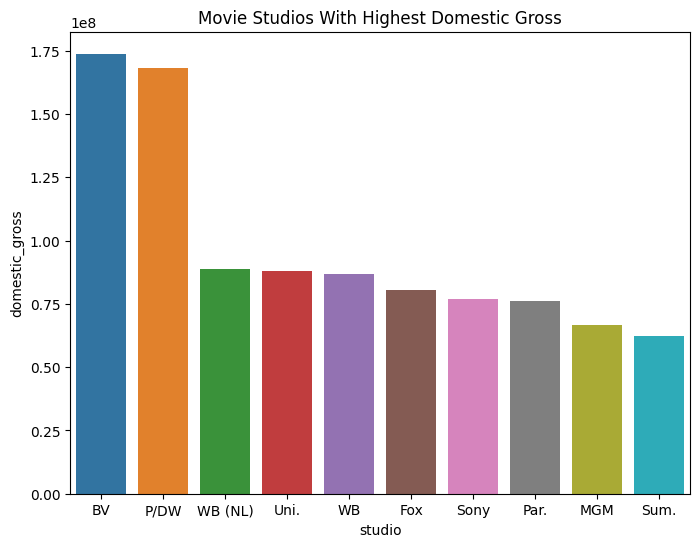

In [167]:
#Ploting a graph for domestic gross
plt.figure(figsize=(8,6))
barplot = sns.barplot(x='studio',y='domestic_gross', data=Bom_Movie_New_df5)
barplot.set(title='Movie Studios With Highest Domestic Gross')
plt.show()

In [158]:
# creating a dataframe
runtimevotes= runtimevotes.rename_axis('votes')
runtimevot= runtimevotes.reset_index(name='minutes')
runtimevot

,votes,minutes
0,148.0,1841066
1,164.0,1387769
2,169.0,1299334
3,165.0,1211405
4,143.0,1183655
5,180.0,1035358
6,138.0,1005960
7,121.0,948394
8,108.0,820847
9,142.0,795227


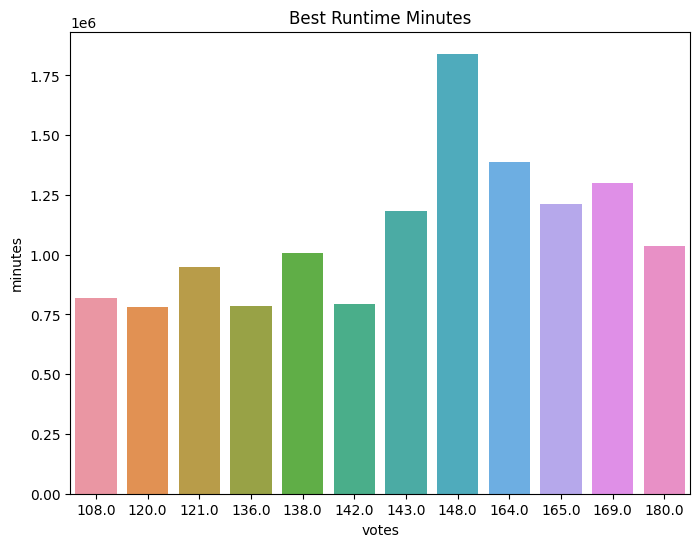

In [166]:
plt.figure(figsize=(8,6))
barplot = sns.barplot(x='votes',y='minutes', data=runtimevot)
barplot.set(title='Best Runtime Minutes')
plt.show()

The highest runtime is at the 148s. This shows that many people prefer to  have or watch Videos that range at around that lenghth.

Text(0, 0.5, 'Genres')

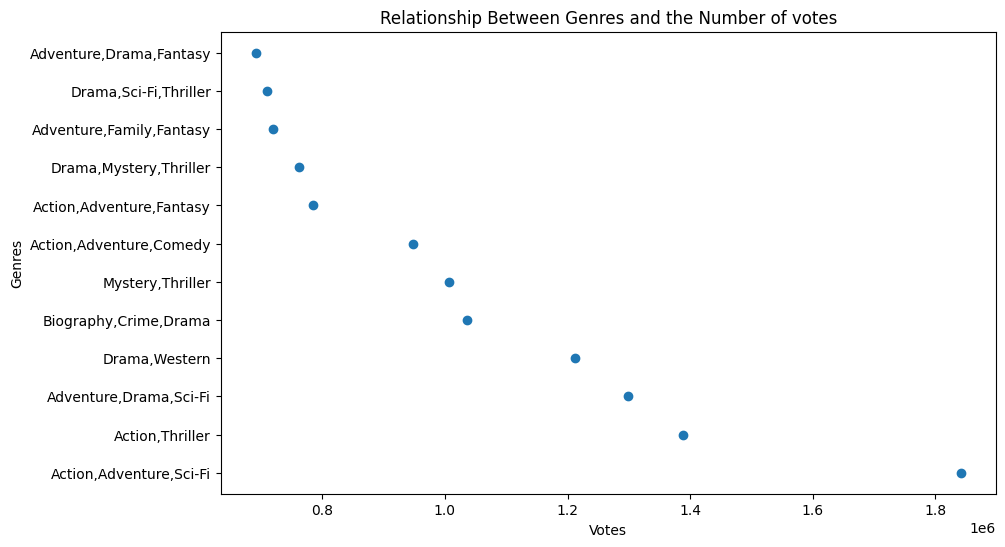

In [165]:
# investigate the relationship between genres and the number of votes of a movie.
scatter_figure, ax = plt.subplots(figsize=(10, 6))
ax.scatter(highest_votes['votes'], highest_votes['genres'])
ax.set_title('Relationship Between Genres and the Number of votes')
ax.set_xlabel('Votes')
ax.set_ylabel('Genres')

There is a negative relationship between the genre and number of votes.

In [163]:
# creating a dataframe
highest_votes= highest_votes.rename_axis('genre')
highest_votes1= highest_votes.reset_index(name='vote')
highest_votes1

,genres,votes
0,"Action,Adventure,Sci-Fi",1841066
1,"Action,Thriller",1387769
2,"Adventure,Drama,Sci-Fi",1299334
3,"Drama,Western",1211405
4,"Biography,Crime,Drama",1035358
5,"Mystery,Thriller",1005960
6,"Action,Adventure,Comedy",948394
7,"Action,Adventure,Fantasy",784780
8,"Drama,Mystery,Thriller",761592
9,"Adventure,Family,Fantasy",719629


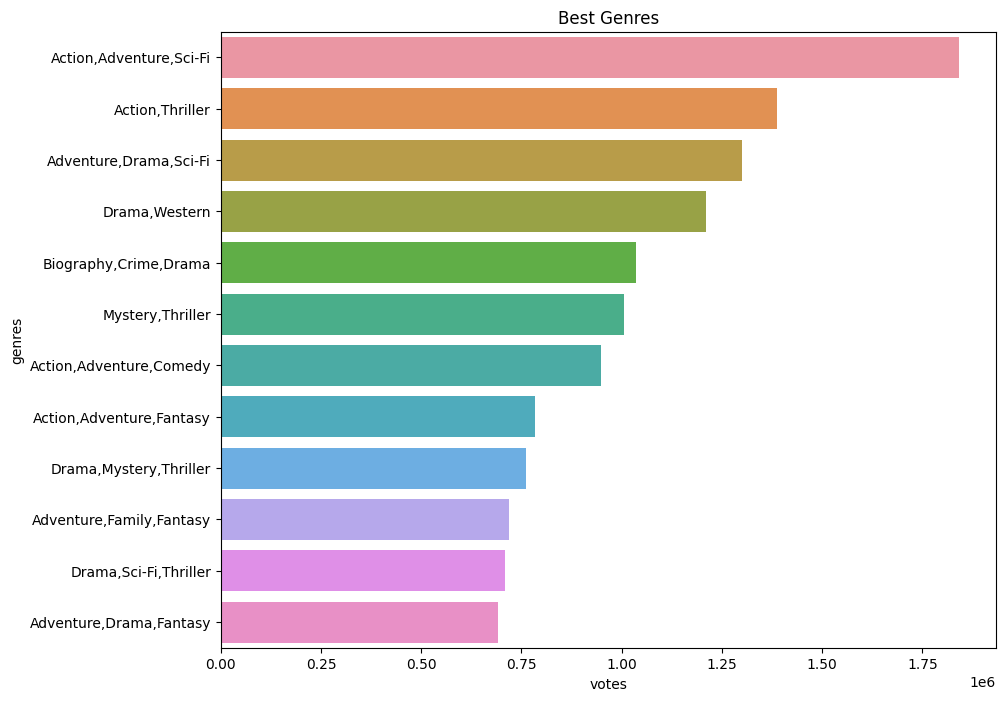

In [164]:
# movie genres with the highest vote.
plt.figure(figsize=(10,8))
barplot = sns.barplot(x='votes',y='genres', data=highest_votes)
barplot.set(title='Best Genres')
plt.show()

Action,Adventure,sci-fi have the largest popularity. This makes them the genres to go for as they wiull definitely have a higher return fetched.